In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def generate_dataset(num_points=100, num_features=2, num_clusters=3, spread=10):
    """Generates a synthetic dataset by placing clusters randomly in space."""
    centers = [
        (random.uniform(-spread, spread), random.uniform(-spread, spread))
        for _ in range(num_clusters)
    ]

    dataset = []
    for _ in range(num_points):
        center = random.choice(centers)
        point = [center[i] + random.gauss(0, 2) for i in range(num_features)]  # Increase variance for less defined clusters
        dataset.append(point)

    return np.array(dataset)

In [ ]:
def euclidean_distance(point1, point2):
    """Computes Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [ ]:
def kmeans(data, k, max_iters=100, tol=1e-4):
    """Performs K-Means clustering."""
    # Initialize centroids randomly from the data points
    centroids = data[random.sample(range(len(data)), k)]

    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        # Compute new centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)])

        # Check convergence (if centroids do not change much)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return centroids, clusters

In [ ]:
# Generate synthetic dataset
data = generate_dataset()
# Convert dataset to DataFrame and show first 5 rows
df = pd.DataFrame(data, columns=[f'Feature {i+1}' for i in range(data.shape[1])])
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Feature 1  Feature 2
0   9.233629  -6.912232
1   7.782964  -7.205422
2   1.627790  -2.554470
3   9.019152  -3.223158
4 -11.948629  -1.975453


In [ ]:
# Apply K-Means clustering
k = 3
centroids, clusters = kmeans(data, k)

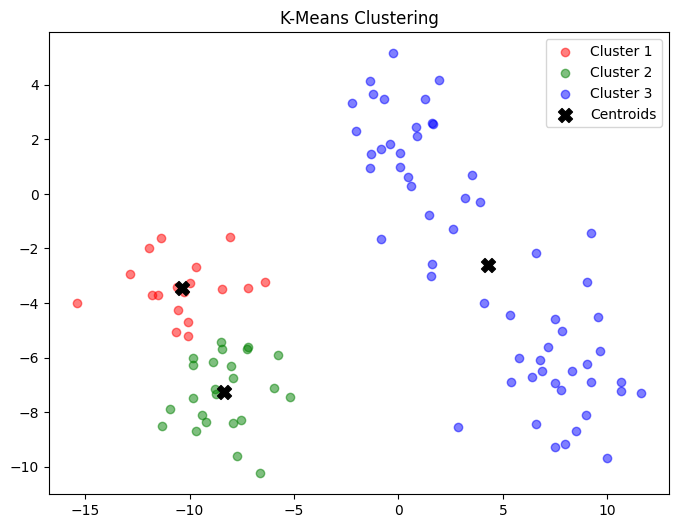

In [ ]:
# Visualize results
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    if len(cluster) > 0:
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], alpha=0.5, label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.legend()
plt.title("K-Means Clustering")
plt.show()

In [ ]:
# Print results
print("Final Centroids:")
print(centroids)

Final Centroids:
[[-10.38213062  -3.43947853]
 [ -8.35525081  -7.26948688]
 [  4.29174503  -2.59109861]]
